In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=np.load('proyecto_training_data.npy') 

# COMMENTS
#Data fields
#Here's a brief version of what you'll find in the data description file.
#SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
#OverallQual: Overall material and finish quality, rates the overall material and finish of the house
#       10	Very Excellent
#       9	Excellent
#       8	Very Good
#       7	Good
#       6	Above Average
#       5	Average
#       4	Below Average
#       3	Fair
#       2	Poor
#       1	Very Poor
#1stFlrSF: First Floor square feet
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#YearBuilt: Original construction date
#LotFrontage: Linear feet of street connected to property
data.shape

(1460, 6)

In [5]:
# 2. Usando sclicing con NumPy separar los datos en 2 datasets:
#entrenamiento(80% de los datos) y validacion y pruebas(20 %).

entrenamiento = data[0: int(len(data) * .8)]
print(entrenamiento.shape)
validacion = data[int(len(data) * .8):len(data)]
print(validacion.shape)
print((entrenamiento.shape[0]+validacion.shape[0])==data.shape[0])

(1168, 6)
(292, 6)
True


In [6]:
# 3. Analisis exploratorio de datos: Para cada variable en el dataset calcular

df1 = pd.DataFrame(entrenamiento, columns=['SalePrice', 'OverallQual', 
                                           '1stFlrSF', 'TotRmsAbvGrd', 
                                           'YearBuilt', 'LotFrontage'])

print("media")
print(df1.mean())
print("\nvalor maximo")
print(df1.max())
print("\nvalor mınimo")
print(df1.min())
print("\nrango")
print(df1.max()-df1.min())
print("\ndesviacion estandar")
print(df1.std())


media
SalePrice       180590.277397
OverallQual          6.101027
1stFlrSF          1156.323630
TotRmsAbvGrd         6.485445
YearBuilt         1971.451199
LotFrontage         69.946985
dtype: float64

valor maximo
SalePrice       755000.0
OverallQual         10.0
1stFlrSF          3228.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64

valor mınimo
SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
dtype: float64

rango
SalePrice       720100.0
OverallQual          9.0
1stFlrSF          2894.0
TotRmsAbvGrd        12.0
YearBuilt          135.0
LotFrontage        292.0
dtype: float64

desviacion estandar
SalePrice       78815.697902
OverallQual         1.378025
1stFlrSF          373.780374
TotRmsAbvGrd        1.609141
YearBuilt          29.951707
LotFrontage        23.478161
dtype: float64


In [7]:
df1.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


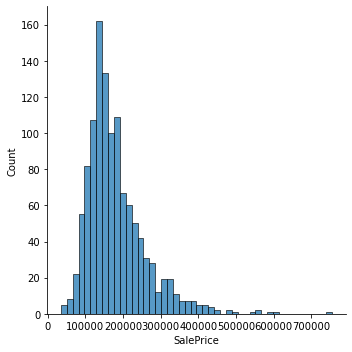

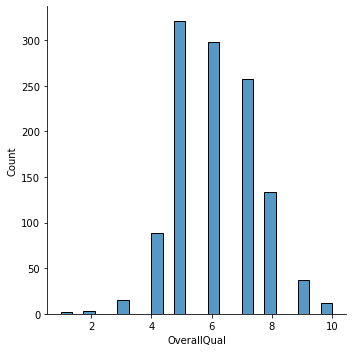

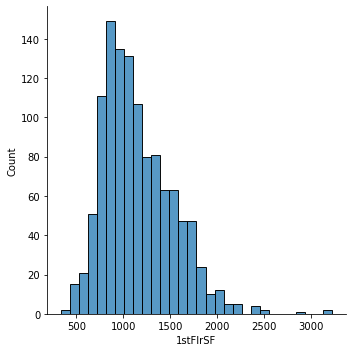

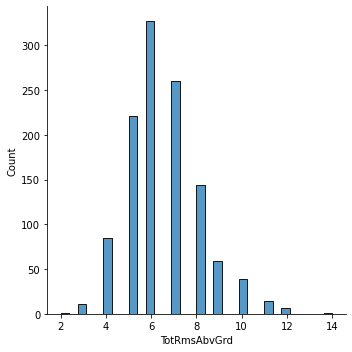

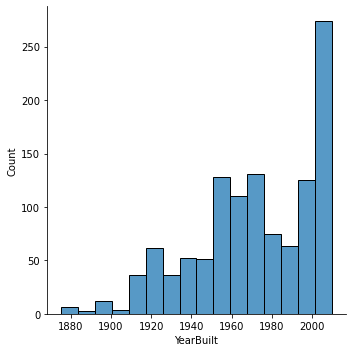

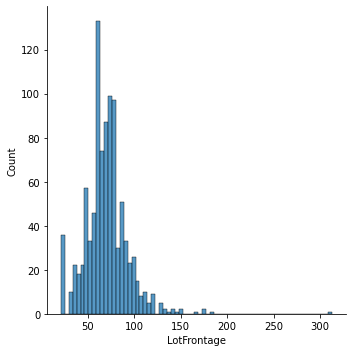

In [8]:
# 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.

cols = df1.columns

for col in cols:
    sns.displot(df1[col])


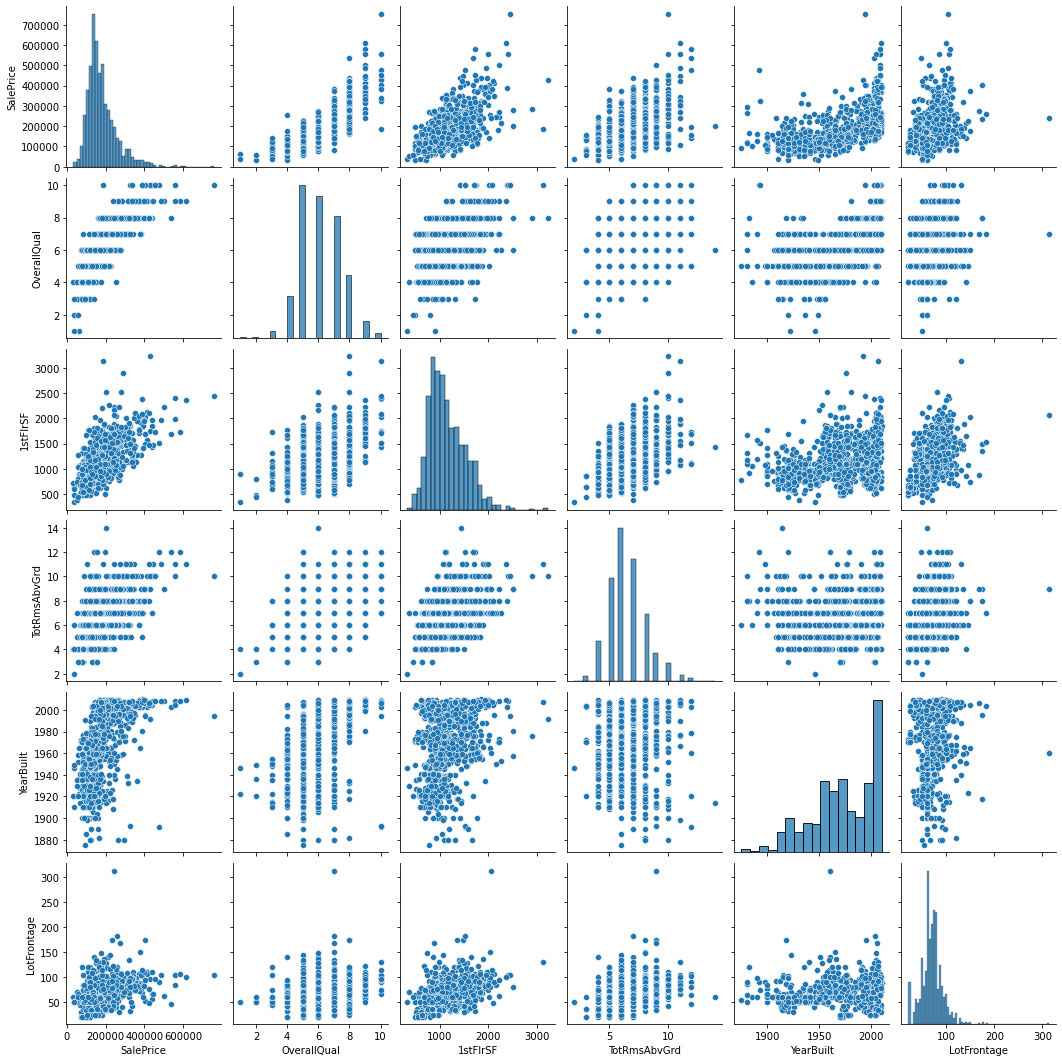

In [9]:
sns.pairplot(df1);

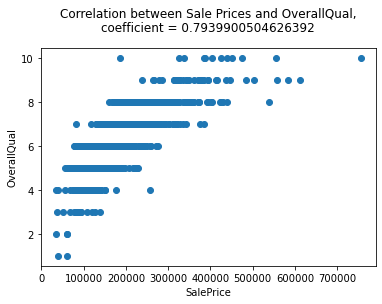

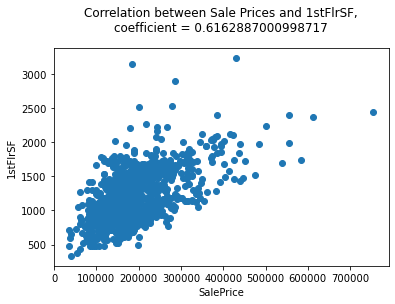

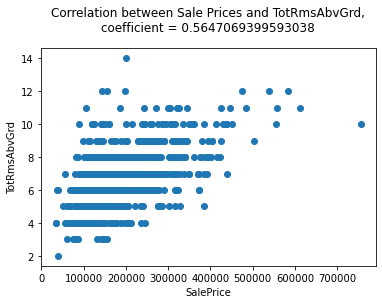

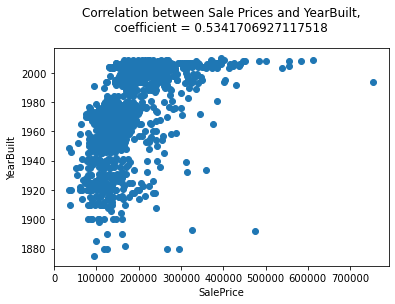

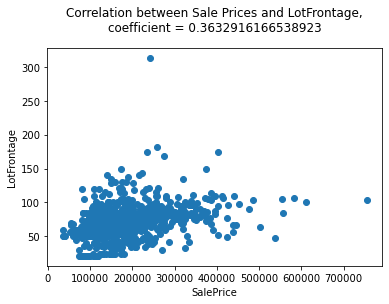

Las 2 variables seleccionadas por mayor correlacion son: OverallQual y 1stFlrSF


In [10]:
# 5. Para cada variable independiente x :
# Calcular el coeficiente de correlaci´on entre x y y.
# Graficar x vs y(scatterplot) usando matplotlib.
# Colocar el coeficiente de correlaci´on y colocarlo como parte del t´ıtulo de la gr´afica.

corr_list=df1.corr()['SalePrice'].tail(5)

for col in cols[-5:]:
    plt.title('Correlation between Sale Prices and {},\ncoefficient = {}'.format(col,corr_list[col]),y=1.05)
    plt.xlabel('SalePrice')
    plt.ylabel(col)
    plt.scatter(df1['SalePrice'], df1[col])
    plt.show()

#Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables
#con mas potencial predictivo es decir las 2 variables que presentan mayor correlacion
#entre dicha variable y la variable dependiente.

selected_var = corr_list.sort_values(ascending=False).head(2).index
print("Las 2 variables seleccionadas por mayor correlacion son: {} y {}".format(selected_var[0],selected_var[1]))

In [11]:
# 6. Crear una funci´on para entrenar un modelo de regresi´on lineal de una variable y = β0 +β1 ∗x

def entrenar(x,y,epochs,imprimir_error_cada,lrate):
    betas = np.array([[0.1],[0.2]]) #B1=0.1 y B0=0.2
    vect1 = np.ones_like(x).reshape(-1, 1)
    result = x
    
    result = np.hstack([result, vect1])
    result = np.matmul(result, betas)
       
    return result

In [12]:
entrenar(np.reshape(df1['OverallQual'].to_list(), (-1, 1)), np.reshape(df1['SalePrice'].to_list(), (-1, 1)),10,1,5)


array([[0.9],
       [0.8],
       [0.9],
       ...,
       [0.9],
       [1. ],
       [0.8]])

In [16]:
df1['OverallQual']

0       7.0
1       6.0
2       7.0
3       7.0
4       8.0
       ... 
1163    4.0
1164    5.0
1165    7.0
1166    8.0
1167    6.0
Name: OverallQual, Length: 1168, dtype: float64